In [27]:
# Utilities
import pandas as pd
import numpy as np
from datetime import datetime, date, time, timedelta
from collections import Counter

# Plotting
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# Modelling
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report

In [3]:
df = pd.read_csv("data/data_train_clean_withdummies.csv")

In [4]:
df.head()

,BatchId,AccountId,SubscriptionId,CustomerId,FraudResult,ValueUSDLog,ProviderId_2,ProviderId_3,ProviderId_4,ProviderId_5,...,DayTime_midday,DayTime_morning,DayTime_night,TransactionWeekday_2,TransactionWeekday_3,TransactionWeekday_4,TransactionWeekday_5,TransactionWeekday_6,TransactionWeekday_7,DebitCredit_1
0,36123,3957,887,4406,0,-1.272966,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,15642,4841,3829,4406,0,-5.184989,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
2,53941,4229,222,4683,0,-1.966113,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,102363,648,2185,988,0,1.808944,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,38780,4841,3829,988,0,-1.713022,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1


### Splitting the data

In [9]:
#separate predictor variables
X = df.drop('FraudResult', axis =1)

# separate target variable
y = df['FraudResult']


In [10]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Data Balance - Oversampling

In [12]:
# apply resampling ONLY to train data
X_train_res, y_train_res = SMOTE().fit_resample(X_train, y_train)

In [38]:
y_train_res

0         0
1         0
2         0
3         0
4         0
         ..
152739    1
152740    1
152741    1
152742    1
152743    1
Name: FraudResult, Length: 152744, dtype: int64

In [20]:
scaler = StandardScaler()

#standardization of train set (fit_transform)
X_train_res_stand = scaler.fit_transform(X_train_res)

#change array to dataframe
scaled_df_train_resampled = pd.DataFrame(X_train_res_stand)
scaled_df_train_resampled.columns = X_train.columns

#standardization of test set (transform)
X_test_stand = scaler.transform(X_test)

#change array to dataframe
scaled_df_test = pd.DataFrame(X_test_stand)
scaled_df_test.columns = X_test.columns

In [21]:
scaled_df_resampled

,BatchId,AccountId,SubscriptionId,CustomerId,ValueUSDLog,ProviderId_2,ProviderId_3,ProviderId_4,ProviderId_5,ProviderId_6,...,DayTime_midday,DayTime_morning,DayTime_night,TransactionWeekday_2,TransactionWeekday_3,TransactionWeekday_4,TransactionWeekday_5,TransactionWeekday_6,TransactionWeekday_7,DebitCredit_1
0,-1.581482,1.261822,0.826375,0.814864,-1.523105,-0.009574,-0.305209,1.999910,-0.376617,-0.467077,...,-0.430158,2.530466,-0.207755,-0.326853,-0.253529,-0.293971,-0.448980,-0.256819,4.133114,1.999910
1,-1.642639,-1.032733,1.431526,-0.839822,-0.469323,-0.009574,-0.305209,-0.500023,-0.376617,2.140974,...,-0.430158,-0.395184,-0.207755,-0.326853,-0.253529,-0.293971,2.227272,-0.256819,-0.241948,-0.500023
2,1.368757,-0.694750,-1.705361,-0.497771,-0.902858,-0.009574,-0.305209,-0.500023,-0.376617,2.140974,...,-0.430158,-0.395184,-0.207755,-0.326853,3.944314,-0.293971,-0.448980,-0.256819,-0.241948,-0.500023
3,-1.401407,1.261822,0.826375,0.545669,-1.619183,-0.009574,-0.305209,1.999910,-0.376617,-0.467077,...,2.324728,-0.395184,-0.207755,-0.326853,-0.253529,-0.293971,-0.448980,3.893800,-0.241948,1.999910
4,-1.344398,-0.140227,0.390527,0.052968,-0.095897,-0.009574,-0.305209,-0.500023,-0.376617,2.140974,...,-0.430158,2.530466,-0.207755,-0.326853,-0.253529,-0.293971,2.227272,-0.256819,-0.241948,-0.500023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152739,1.128326,0.753563,-0.992551,0.930939,0.934625,-0.009574,-0.305209,-0.500023,2.655216,-0.467077,...,-0.430158,-0.395184,-0.207755,-0.326853,-0.253529,-0.293971,-0.448980,-0.256819,-0.241948,-0.500023
152740,-0.232679,0.507465,0.838530,0.688910,0.804096,-0.009574,-0.305209,-0.500023,-0.376617,-0.467077,...,-0.430158,-0.395184,-0.207755,-0.326853,-0.253529,-0.293971,-0.448980,-0.256819,-0.241948,-0.500023
152741,0.386484,-1.260196,-2.125581,-1.067033,0.780724,-0.009574,-0.305209,-0.500023,-0.376617,-0.467077,...,2.324728,-0.395184,-0.207755,-0.326853,-0.253529,-0.293971,-0.448980,-0.256819,-0.241948,-0.500023
152742,-0.068882,-0.581661,-1.210475,-0.386636,0.791801,-0.009574,3.276446,-0.500023,-0.376617,-0.467077,...,2.324728,-0.395184,-0.207755,-0.326853,-0.253529,-0.293971,-0.448980,-0.256819,-0.241948,-0.500023


---

## Base Line Model

>Uniform 0.500 (0.005)
>Stratified 0.500 (0.004)
>Majority 0.133 (0.267)
>Minority 0.667 (0.000)
>Prior 0.133 (0.267)


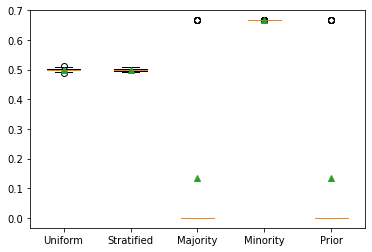

In [23]:
# compare naive classifiers with f1-measure
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.dummy import DummyClassifier
from matplotlib import pyplot

# evaluate a model
def evaluate_model(X, y, model):
	# define evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1)
	return scores

# define models to test
def get_models():
	models, names = list(), list()
	# Uniformly Random Guess
	models.append(DummyClassifier(strategy='uniform'))
	names.append('Uniform')
	# Prior Random Guess
	models.append(DummyClassifier(strategy='stratified'))
	names.append('Stratified')
	# Majority Class: Predict 0
	models.append(DummyClassifier(strategy='most_frequent'))
	names.append('Majority')
	# Minority Class: Predict 1
	models.append(DummyClassifier(strategy='constant', constant=1))
	names.append('Minority')
	# Class Prior
	models.append(DummyClassifier(strategy='prior'))
	names.append('Prior')
	return models, names

# define dataset
"""
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)
"""
# define models
models, names = get_models()
results = list()
# evaluate each model
for i in range(len(models)):
	# evaluate the model and store results
	scores = evaluate_model(scaled_df_train_resampled, y_train_res, models[i])
	results.append(scores)
	# summarize and store
	print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))
# plot the results
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

### Results:

The 'Minority' `DummyClassifier` seems to deliver the best result (0.667) for a naive classifier with regards to the f1 score metric which is our goal.

In [32]:
dummy_clf = DummyClassifier(strategy="constant", constant=1)
dummy_clf.fit(scaled_df_train_resampled, y_train_res)

y_dummy_pred = dummy_clf.predict(scaled_df_train_resampled)

In [39]:
print("------"*10)
print(classification_report(y_train_res, y_dummy_pred))
print("------"*10)

# F1-score on test set
print("F1-score:", f1_score(y_train_res, y_dummy_pred, average='binary'))
print("------"*10)

f1_baseline = f1_score(y_train_res, y_dummy_pred, average='binary')

------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     76372
           1       0.50      1.00      0.67     76372

    accuracy                           0.50    152744
   macro avg       0.25      0.50      0.33    152744
weighted avg       0.25      0.50      0.33    152744

------------------------------------------------------------
F1-score: 0.6666666666666666
------------------------------------------------------------


/Users/fabioteichmann/neuefische/projects/ds-ml-project/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/fabioteichmann/neuefische/projects/ds-ml-project/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/fabioteichmann/neuefische/projects/ds-ml-project/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` param

## Modelling

### First Models

1. SVM ==> Daniela
2. LogReg ==> Kai Yang

### Advanced Models

1. Random Forest ==> Fabio
2. AdaBoost ==> 
3. Stacking ==> 

In [41]:
# save TRAIN sets
scaled_df_train_resampled.to_csv('data/x-train.csv', index=False)
y_train_res.to_csv('data/y-train.csv', index=False)

# save TEST sets
scaled_df_test.to_csv('data/x-test.csv', index=False)
y_test.to_csv('data/y-test.csv', index=False)